In [15]:
import tensorflow as tf
from tensorflow import keras

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras import backend as K
from tensorflow.keras.utils import get_custom_objects
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D  


In [16]:
def func(x, y):
    return np.sin( x**2 + y**2)

x_train = np.random.uniform(-1.5, 1.5, 1000)
y_train = np.random.uniform(-1.5, 1.5, 1000)
x_valid = np.random.uniform(-1.5, 1.5, 100)
y_valid = np.random.uniform(-1.5, 1.5, 100)

z_target = func(x_valid, y_valid) # ideal (target) linear function

sigma = 0.2 # noise standard deviation, for the moment it is absent
z_train = np.random.normal(func(x_train, y_train), sigma) # actual measures from which we want to guess regression parameters
z_valid = np.random.normal(func(x_valid, y_valid) , sigma)

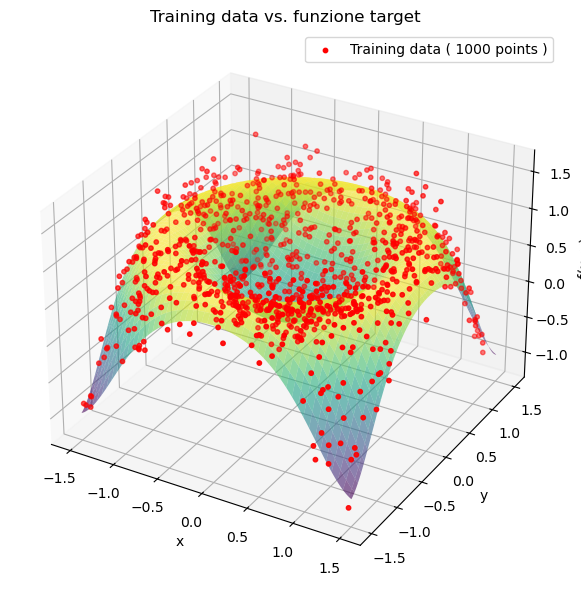

In [17]:

x = np.linspace(-1.5, 1.5, 100)
y = np.linspace(-1.5, 1.5, 100)
X, Y = np.meshgrid(x, y)
Z = func(X, Y)

# Crea figura 3D
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')

# ✅ Superficie
ax.plot_surface(X, Y, Z, cmap='viridis', alpha=0.6)

# ✅ Dati di training come scatter
ax.scatter(x_train, y_train, z_train, color='r', s=10, label="Training data ( 1000 points )")

# Etichette e legenda
ax.set_title("Training data vs. funzione target")
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("f(x, y)")
ax.legend()

plt.tight_layout()
plt.show()

In [ ]:
nep= 100
n_neurons= 30

pair_train  = np.column_stack((x_train, y_train))   
pair_valid  = np.column_stack((x_valid, y_valid))   

modeltanh = tf.keras.Sequential()
modeltanh.add(Dense(40, input_shape = (2,), activation = 'tanh'))
modeltanh.add(Dense(20, activation = 'tanh'))
modeltanh.add(Dense(1, activation = 'tanh'))
modeltanh.compile(optimizer = 'adam', loss = 'mse', metrics = ['mse'])
modeltanh.fit(x = pair_train, y = z_train, batch_size = 32, epochs = nep, shuffle = True, validation_data = (pair_valid, z_valid))
historytanh = modeltanh.fit(x = pair_train, y = z_train, verbose=0, batch_size = 32, epochs = nep, shuffle = True, validation_data = (pair_valid, z_valid))

Epoch 1/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.5271 - mse: 0.5271 - val_loss: 0.2341 - val_mse: 0.2341
Epoch 2/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.2543 - mse: 0.2543 - val_loss: 0.1630 - val_mse: 0.1630
Epoch 3/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1840 - mse: 0.1840 - val_loss: 0.1653 - val_mse: 0.1653
Epoch 4/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.1725 - mse: 0.1725 - val_loss: 0.1642 - val_mse: 0.1642
Epoch 5/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.1990 - mse: 0.1990 - val_loss: 0.1630 - val_mse: 0.1630
Epoch 6/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.1837 - mse: 0.1837 - val_loss: 0.1636 - val_mse: 0.1636
Epoch 7/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.1862 - mse: 0.1862 - val_loss: 0.1659 - val_mse: 0.1659
Epoch 8/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.1889 - mse: 0.1889 - val_loss: 0.1647 - val_mse: 0.1647
Epoch 9/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.

In [19]:
#questo score mi dice come il modello agisce rispetto al campione di validazione in cui lafunzione è falutata con un certo sigma predefinito
score = modeltanh.evaluate(pair_valid, z_valid, batch_size = 32, verbose = 0)
print('Test loss:\t\t', score[0])
print('Test accuracy:\t\t', score[1])

#qui invece vedo come il modello predice rispetto alla funzione target esatta 
score = modeltanh.evaluate(pair_valid, z_target, batch_size = 32, verbose = 0)
print('Test loss:\t\t', score[0])
print('Test accuracy:\t\t', score[1])

Test loss:		 0.04883793368935585
Test accuracy:		 0.04883793368935585
Test loss:		 0.011634900234639645
Test accuracy:		 0.011634900234639645


79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


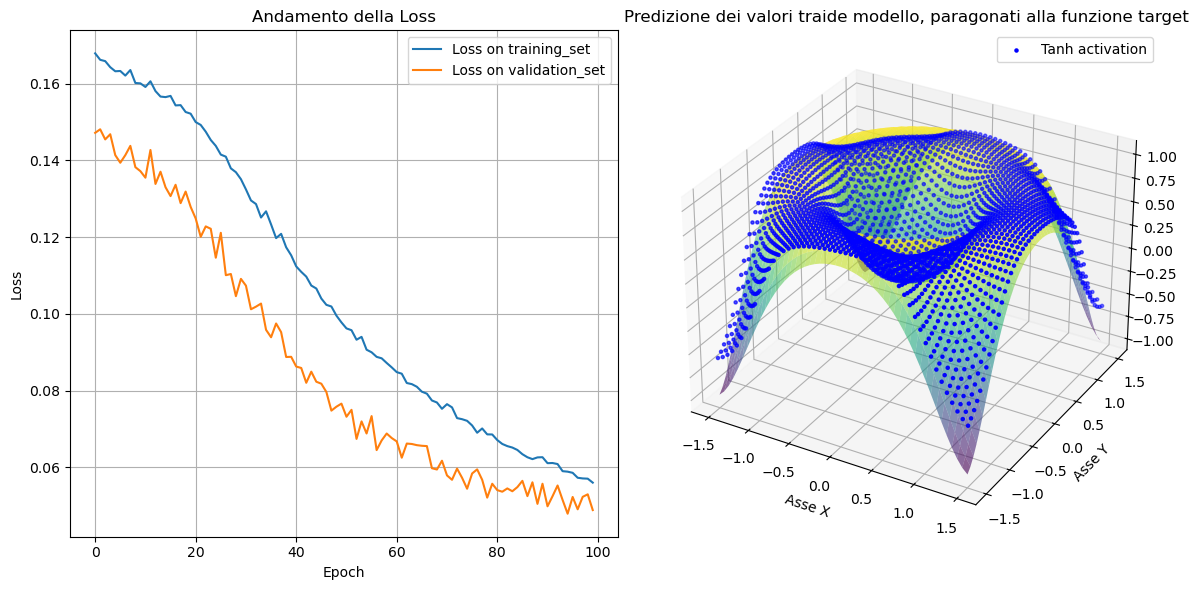

In [20]:
fig = plt.figure(figsize=(12, 6))

#PRIMO PLOT
ax = fig.add_subplot(1, 2, 1)

ax.set_title(f"Andamento della Loss")
ax.set_xlabel("Epoch")
ax.set_ylabel("Loss")
ax.plot(historytanh.history['loss'], label ='Loss on training_set')
ax.plot(historytanh.history['val_loss'], label ='Loss on validation_set')
ax.legend()
ax.grid()

#SECONDO PLOT
ax2 = fig.add_subplot(1, 2, 2, projection='3d')
x_predicted = np.linspace(-3./2, 3./2, 50) 
y_predicted = np.linspace(-3./2, 3./2, 50)
x, y = np.meshgrid(x_predicted, y_predicted)
pair_pred = np.column_stack((x.ravel(), y.ravel()))
#pair_pred= np.column_stack((x_predicted,y_predicted))
z_pred = modeltanh.predict(pair_pred).reshape(x.shape)


z_target = func(x, y)
ax2.set_title(f"Predizione dei valori traide modello, paragonati alla funzione target")
ax2.set_xlabel("Asse X")
ax2.set_ylabel("Asse Y")
ax2.plot_surface(x, y, z_target, cmap='viridis', alpha=0.6)
ax2.scatter(pair_pred[:,0], pair_pred[:,1], z_pred.ravel(), marker = ".", color = "b", label = 'Tanh activation')
ax2.grid(True)
ax2.legend()


plt.tight_layout()
plt.show()
